In [32]:
# 🧩 Zelle 1: Alle Importe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Herstellung der Verbindung zur PostgreSQL-Datenbank
Was passiert im Code?
Hier wird eine Verbindung zur Datenbank „redezeit“ auf deinem lokalen Rechner aufgebaut.
Dazu nutzen wir die Zugangsdaten (Host, Port, Benutzername, Passwort und Datenbankname).
Die Funktion db_connect() versucht, diese Verbindung herzustellen und gibt entweder eine Erfolgsmeldung aus oder zeigt den Fehler, falls etwas schiefgeht.

Warum ist das wichtig?
Ohne eine funktionierende Verbindung können wir keine Daten aus der Datenbank abrufen oder speichern. Diese Verbindung ist die Grundlage, damit wir mit unseren Daten arbeiten können.

Was sieht man später?
Wenn der Verbindungsaufbau klappt, kann der Code danach problemlos Daten aus der Datenbank laden und wieder speichern.
Im weiteren Verlauf nutzt unser Analyse-Notebook diese Verbindung für alle Datenabfragen und Änderungen.

In [ ]:
# 🔌 Zelle 2: Verbindung zur PostgreSQL-Datenbank
import psycopg2

DB_PARAMS = {
    "host": "localhost",
    "port": 5432,
    "user": "postgres",
    "password": "Datacraft",
    "dbname": "redezeit",
}


def db_connect():
    try:
        conn = psycopg2.connect(**DB_PARAMS)
        print("✅ Verbindung zur Datenbank erfolgreich!")
        return conn
    except Exception as e:
        print("❌ Fehler bei der DB-Verbindung:", e)


conn = db_connect()

✅ Verbindung zur Datenbank erfolgreich!


# Laden der Daten aus der Datenbank in DataFrames
In diesem Schritt holen wir die Daten aus der PostgreSQL-Datenbank in unser Python-Umfeld, genauer gesagt in sogenannte DataFrames von Pandas.

Was passiert im Code?
Für jede der wichtigen Tabellen in der Datenbank wird eine Funktion load_table aufgerufen, die per SQL-Abfrage alle Daten aus der jeweiligen Tabelle abruft und in einem DataFrame speichert.
So haben wir die Daten für weitere Analysen als gut handhabbare Python-Objekte vorliegen.

Warum machen wir das?
Datenbanken speichern große Datenmengen strukturiert und sicher. Für die Analyse benötigen wir die Daten aber in einem Format, das einfach zu bearbeiten und zu visualisieren ist. Pandas DataFrames sind ideal dafür, da sie viele Funktionen für Datenmanipulation und -analyse bieten.

Was sieht man später?
Wir sehen später bei den Analysen, dass wir mit diesen DataFrames arbeiten, um beispielsweise Verteilungen zu berechnen, Grafiken zu erstellen oder komplexe Auswertungen durchzuführen.


In [ ]:
# 📥 Zelle 3: Daten aus den DB-Tabellen in DataFrames laden
def load_table(name):
    return pd.read_sql(f'SELECT * FROM "{name}"', conn)


df_landingpage = load_table("landingpage")
df_user_behaviors = load_table("user_behaviors")
df_what_did_user_do = load_table("what_did_user_do")
df_where_did_they_come_from = load_table("where_did_they_come_from")
df_what_devices_used = load_table("what_devices_used")
df_where_new_visitors_come_from = load_table("where_new_visitors_come_from")
df_who_was_visiting = load_table("who_was_visiting")

# Überblick über die Datentabellen und erste explorative Analysen
In diesem Codeblock verschaffen wir uns zunächst einen Überblick über die verfügbaren Datentabellen, indem wir die Anzahl der Zeilen und Spalten (also die Größe) jeder Tabelle ausgeben. So sehen wir, wie viele Datenpunkte wir in jeder Tabelle vorliegen haben, was uns hilft einzuschätzen, wie umfangreich die Daten sind.

Anschließend visualisieren wir die Verteilung der Besucher nach Kategorien, hier beispielhaft nach dem Geschlecht (Gender). Die Balkengrafik zeigt uns, wie viele Besucher insgesamt männlich, weiblich oder sonst wie kategorisiert sind. Diese Verteilung gibt einen ersten Einblick in die Zusammensetzung der Nutzerbasis der Plattform.

Zum Schluss untersuchen wir die Zusammenhänge (Korrelationen) zwischen verschiedenen numerischen Verhaltenskennzahlen aus der Tabelle user_behaviors. Die Korrelationsmatrix zeigt uns auf einen Blick, wie stark die verschiedenen Kennzahlen wie Seitenaufrufe, Nutzeranzahl, durchschnittliche Verweildauer, Absprungrate und Seiten pro Sitzung miteinander zusammenhängen. Positive Werte (nahe +1) bedeuten, dass zwei Merkmale zusammen steigen, negative Werte (nahe -1) dass sie entgegengesetzt verlaufen, und Werte um 0 zeigen keine klare Beziehung. So können wir z.B. erkennen, ob eine längere Verweildauer auf mehr Seiten pro Sitzung hinweist oder wie die Absprungrate sich auf die Seitenaufrufe auswirkt.

# Was man in den Visualisierungen sieht und was das bedeutet:

Die Balkengrafik verdeutlicht, welche Nutzerkategorien am häufigsten vertreten sind. Dies hilft zu verstehen, wer die Hauptzielgruppe ist.

Die Heatmap der Korrelationen zeigt, welche Verhaltensmetriken eng miteinander verbunden sind. Zum Beispiel kann eine starke positive Korrelation zwischen „Seitenaufrufe“ und „Seiten pro Sitzung“ bedeuten, dass Nutzer, die viele Seiten aufrufen, auch tendenziell längere Sitzungen haben.

Diese Erkenntnisse liefern eine Basis, um später Nutzergruppen zu identifizieren und typische Verhaltensmuster herauszufiltern.


Landingpage: (16634, 4)
User Behaviors: (894, 7)
What Did User Do: (19119, 6)
Where Did They Come From: (7469, 6)
What Devices Used: (2246, 3)
Where New Visitors Come From: (7228, 3)
Who Was Visiting: (630, 3)


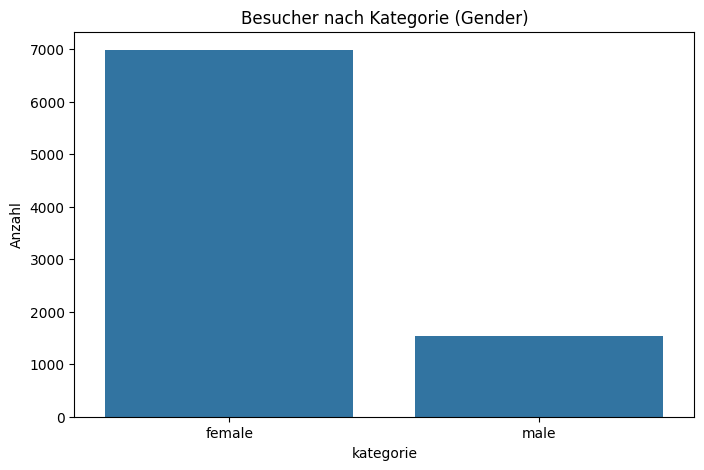

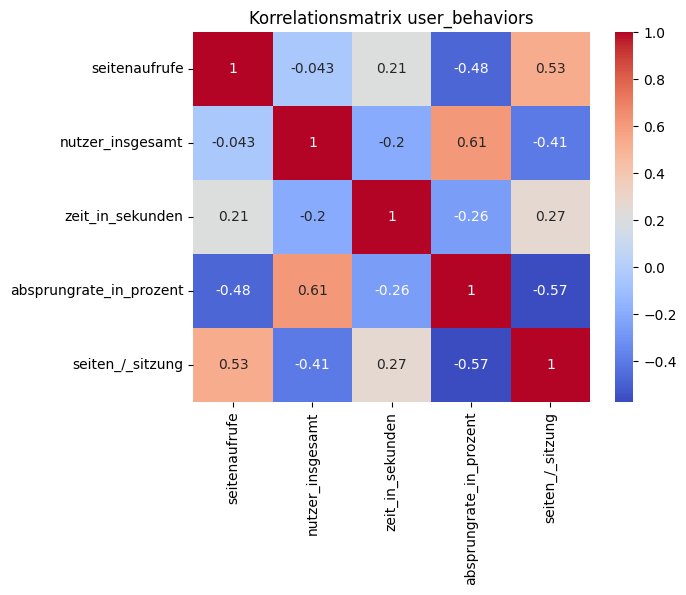

In [59]:
# Überblick über Tabellen
print("Landingpage:", df_landingpage.shape)
print("User Behaviors:", df_user_behaviors.shape)
print("What Did User Do:", df_what_did_user_do.shape)
print("Where Did They Come From:", df_where_did_they_come_from.shape)
print("What Devices Used:", df_what_devices_used.shape)
print("Where New Visitors Come From:", df_where_new_visitors_come_from.shape)
print("Who Was Visiting:", df_who_was_visiting.shape)

# Beispiel Verteilung Besucher nach Kategorie (Gender)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_who_was_visiting.groupby("kategorie")["wert"].sum().reset_index(),
    x="kategorie",
    y="wert",
)
plt.title("Besucher nach Kategorie (Gender)")
plt.ylabel("Anzahl")
plt.show()

# Korrelationen bei user_behaviors (numerisch)
num_cols = [
    "seitenaufrufe",
    "nutzer_insgesamt",
    "zeit_in_sekunden",
    "absprungrate_in_prozent",
    "seiten_/_sitzung",
]
sns.heatmap(df_user_behaviors[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Korrelationsmatrix user_behaviors")
plt.show()

# Aggregation der Verhaltensdaten pro Tag
In diesem Codeblock fassen wir die Nutzerdaten aus der Tabelle user_behaviors auf Tagesbasis zusammen. Das bedeutet, wir berechnen für jeden einzelnen Tag folgende Kennzahlen:

Seitenaufrufe: Die Gesamtzahl der aufgerufenen Seiten an diesem Tag.

Nutzer Insgesamt: Die Summe aller Nutzer, die an diesem Tag die Plattform genutzt haben.

Durchschnittliche Verweildauer: Die mittlere Zeit (in Sekunden), die Nutzer auf der Seite verbracht haben.

Durchschnittliche Absprungrate: Der durchschnittliche Anteil an Besuchern, die die Seite sofort wieder verlassen haben.

Seiten pro Sitzung: Die durchschnittliche Anzahl der Seiten, die ein Nutzer pro Besuch angeschaut hat.

Durch diese Aggregation gewinnen wir eine kompakte Tagesübersicht, die es ermöglicht, Trends und Muster im Nutzerverhalten über die Zeit besser zu erkennen. Beispielsweise können wir so Tage mit besonders hohem Traffic oder mit besonders langer Verweildauer identifizieren.

# Was man sieht und was es bedeutet:

# Die Tabelle zeigt eine erste Zusammenfassung der wichtigsten Verhaltenskennzahlen pro Tag.

Diese aggregierten Werte bilden die Grundlage, um zeitliche Veränderungen im Nutzerverhalten zu analysieren, wie z.B. ob es bestimmte Wochentage mit besonders vielen Besuchern gibt oder wie sich die Verweildauer über die Zeit verändert.

Diese Informationen sind wichtig, um saisonale Effekte, Spitzenzeiten oder potenzielle Problemzeiten (z.B. hohe Absprungrate) zu erkennen und darauf reagieren zu können.

In [60]:
# 🧱 Zelle 5: Verhaltensfeatures aggregieren (pro Tag, pro Quelle, pro Event...)

# Aggregation pro Tag: Seitenaufrufe & durchschnittliche Verweildauer
daily_agg = (
    df_user_behaviors.groupby("datum")
    .agg(
        {
            "seitenaufrufe": "sum",
            "nutzer_insgesamt": "sum",
            "zeit_in_sekunden": "mean",
            "absprungrate_in_prozent": "mean",
            "seiten_/_sitzung": "mean",
        }
    )
    .reset_index()
)

daily_agg.head()

,datum,seitenaufrufe,nutzer_insgesamt,zeit_in_sekunden,absprungrate_in_prozent,seiten_/_sitzung
0,2023-01-01,20,6,62.0,0.00,2.0
1,2023-01-02,434,15,278.0,5.56,24.0
2,2023-01-03,120,18,167.0,4.76,5.0
3,2023-01-04,284,32,114.0,17.50,7.0
4,2023-01-05,143,30,128.0,2.63,3.0


# Erstellung einer Featurematrix und Clustering der Tagesdaten
In diesem Schritt bereiten wir die aggregierten Tagesdaten für eine Nutzergruppenanalyse vor:

Zuerst entfernen wir das Datum, weil wir uns auf die numerischen Merkmale konzentrieren wollen.

Diese Merkmale werden standardisiert, also in eine vergleichbare Größenordnung gebracht, damit keine einzelne Kennzahl das Ergebnis dominiert.

Dann wenden wir eine Hauptkomponentenanalyse (PCA) an, die aus den vielen Merkmalen zwei Hauptachsen (Komponenten) berechnet. Diese fassen die wichtigsten Variationen der Daten zusammen und erlauben eine anschauliche 2D-Darstellung.

Die Punkte in der Scatterplot-Grafik zeigen jeden Tag als Punkt in diesem neuen Koordinatensystem. So kann man erkennen, ob Tage sich ähnlich verhalten oder stark unterscheiden.

Im nächsten Schritt nutzen wir KMeans-Clustering, um die Tage in 3 Gruppen zu unterteilen:

Die Cluster gruppieren Tage mit ähnlichen Nutzerverhalten zusammen.

Die Farben im zweiten Plot zeigen, zu welchem Cluster jeder Tag gehört.

Die Cluster wurden beispielhaft beschriftet, z.B. „Cluster A“ mit geringer Aktivität, „Cluster B“ mit hoher Verweildauer, „Cluster C“ mit hohen Seitenaufrufen – diese Labels sind Interpretationen, die man an die Daten anpassen kann.

# Was man sieht und was es bedeutet:

Die PCA-Visualisierung zeigt, wie sich die Tage im Verhalten unterscheiden und ob es Muster oder Ausreißer gibt.

Die Cluster-Farben verdeutlichen, dass es tatsächlich verschiedene Gruppen von Tagen mit unterschiedlichen Nutzerverhalten gibt.

Diese Einteilung kann helfen, typische Nutzungsmuster zu verstehen, z.B. welche Tage besonders erfolgreich sind oder wo Optimierungspotenzial besteht.

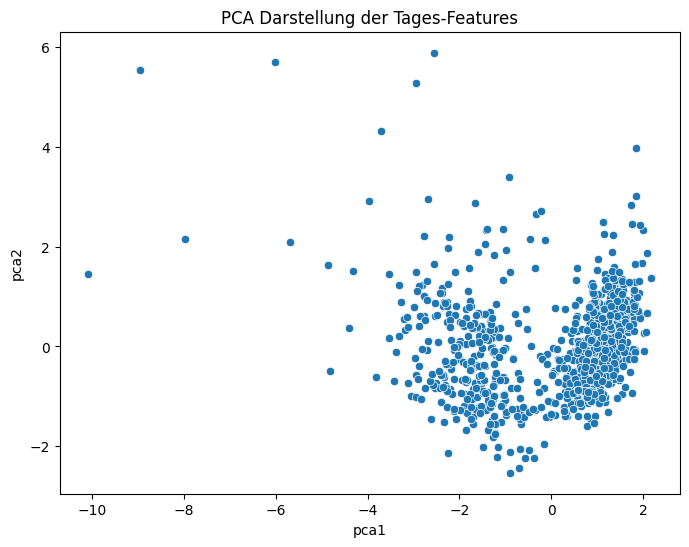

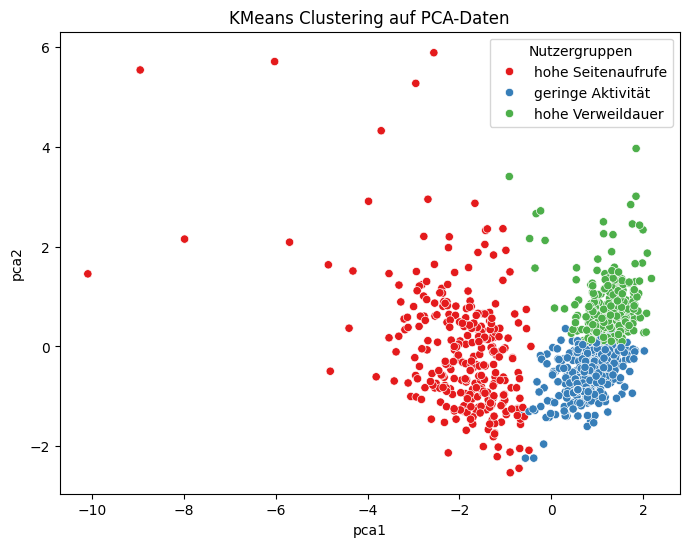

In [61]:
# Featurematrix für Clustering
features = daily_agg.drop(columns=["datum"])

# Standardisierung
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA (2 Komponenten)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

daily_agg["pca1"] = pca_result[:, 0]
daily_agg["pca2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca1", y="pca2", data=daily_agg)
plt.title("PCA Darstellung der Tages-Features")
plt.show()

# KMeans Clustering (z.B. 3 Cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
daily_agg["cluster"] = kmeans.fit_predict(features_scaled)

# Cluster-Bezeichnungen (Beispiel, du kannst sie anpassen)
cluster_labels = {
    0: "geringe Aktivität",
    1: "hohe Verweildauer",
    2: "hohe Seitenaufrufe",
}

daily_agg["cluster_label"] = daily_agg["cluster"].map(cluster_labels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca1", y="pca2", hue="cluster_label", palette="Set1", data=daily_agg)
plt.title("KMeans Clustering auf PCA-Daten")
plt.legend(title="Nutzergruppen")
plt.show()

# Analyse von Nutzer-Events mit Assoziationsregeln (Apriori Algorithmus)
In diesem Schritt analysieren wir, welche Events Nutzer häufig gemeinsam besuchen:

Zunächst wandeln wir die Event-Daten in eine Matrix um, in der für jeden Tag festgehalten wird, wie viele Nutzer ein bestimmtes Event besucht haben.

Danach vereinfachen wir die Daten, indem wir nur noch festhalten, ob ein Event an einem Tag besucht wurde (1) oder nicht (0). Diese binäre Darstellung ist wichtig für die folgende Assoziationsanalyse.

Mit dem Apriori-Algorithmus suchen wir nach häufig gemeinsam auftretenden Events (sogenannten Frequent Itemsets). Hierbei betrachten wir nur Events, die an mindestens 10 % der Tage gemeinsam besucht wurden.

Anschließend berechnen wir Assoziationsregeln, die uns zeigen, wie stark das Auftreten eines Events mit einem anderen zusammenhängt. Dabei sind wichtige Kennzahlen:

Support: Wie oft die Kombination insgesamt auftritt.

Confidence: Wie wahrscheinlich ist das zweite Event, wenn das erste besucht wurde.

Lift: Wie viel stärker ist die Verbindung verglichen mit rein zufälligem Auftreten (Wert > 1 bedeutet eine positive Assoziation).

# Was man sieht und was es bedeutet:

Die Tabelle zeigt die stärksten Regeln, also welche Event-Kombinationen besonders häufig und signifikant zusammen auftreten.

Diese Erkenntnisse können helfen, Nutzergruppen zu verstehen, die an bestimmten Themen interessiert sind, oder passende Events zu empfehlen.

Zum Beispiel könnte man feststellen, dass Nutzer, die Event A besuchen, häufig auch Event B besuchen – was für gezielte Empfehlungen oder Marketingaktionen genutzt werden kann.

In [62]:
# Pivot für Event-Name und Anzahl Nutzer am Tag (binär: Event besucht oder nicht)
event_pivot = df_what_did_user_do.pivot_table(
    index="datum",
    columns="name_des_events",
    values="aktive_nutzer",
    aggfunc="sum",
    fill_value=0,
)

# Binarisieren (Event besucht: 1, sonst 0)
event_binary = event_pivot.applymap(lambda x: 1 if x > 0 else 0)

# Apriori Frequent Itemsets
freq_items = apriori(event_binary, min_support=0.1, use_colnames=True)

# Assoziationsregeln
rules = association_rules(freq_items, metric="lift", min_threshold=1.0)
rules[["antecedents", "consequents", "support", "confidence", "lift"]].sort_values(
    by="lift", ascending=False
).head()

,antecedents,consequents,support,confidence,lift
49,(Phone),"(Website, Email, Checked)",0.531002,0.925208,1.104280
36,"(Website, Email, Checked)",(Phone),0.531002,0.633776,1.104280
12,"(Email, Checked)",(Phone),0.532591,0.630885,1.099243
17,(Phone),"(Email, Checked)",0.532591,0.927978,1.099243
42,"(Website, Phone)","(Email, Checked)",0.531002,0.927778,1.099006


# Zeitliche Entwicklung der Nutzung und Besucherquellen
In diesem Abschnitt visualisieren wir, wie sich die Nutzung der Plattform über die Zeit entwickelt hat und woher die Besucher kommen:

Seitenaufrufe über die Zeit:
Wir zeigen die tägliche Anzahl der Seitenaufrufe als Liniendiagramm. So kann man Trends erkennen, z.B. ob es bestimmte Zeiträume mit besonders hoher oder niedriger Nutzung gibt. Solche Muster helfen zu verstehen, wann Nutzer besonders aktiv sind und ob es saisonale oder kampagnenbedingte Schwankungen gibt.

Top 3 Besucherquellen über Zeit:
Hier betrachten wir die drei wichtigsten Quellen, von denen Nutzer auf die Plattform kommen (z.B. Google, direkte Zugriffe, bestimmte Websites). Für jede dieser Quellen wird dargestellt, wie viele Sitzungen sie täglich erzeugt haben.
Das zeigt, welche Kanäle am meisten Traffic bringen und ob deren Bedeutung über die Zeit zunimmt oder abnimmt. So lassen sich z.B. Erfolge von Marketingmaßnahmen oder Änderungen im Nutzerverhalten ableiten.

# Was man sieht und was es bedeutet:

Im ersten Diagramm erkennt man, ob die Nutzerzahlen stabil, wachsend oder saisonal schwankend sind.

Im zweiten Diagramm sieht man, welche Besucherquellen besonders relevant sind und ob sie konstant oder variabel zum Traffic beitragen.

Zusammen helfen diese Einblicke dabei, die Plattform besser zu verstehen und gezielt zu steuern, z.B. durch Verstärkung erfolgreicher Kanäle.



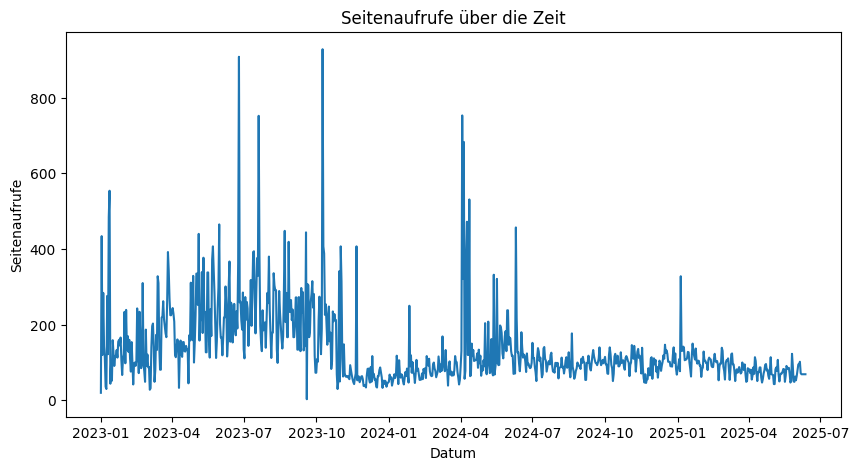

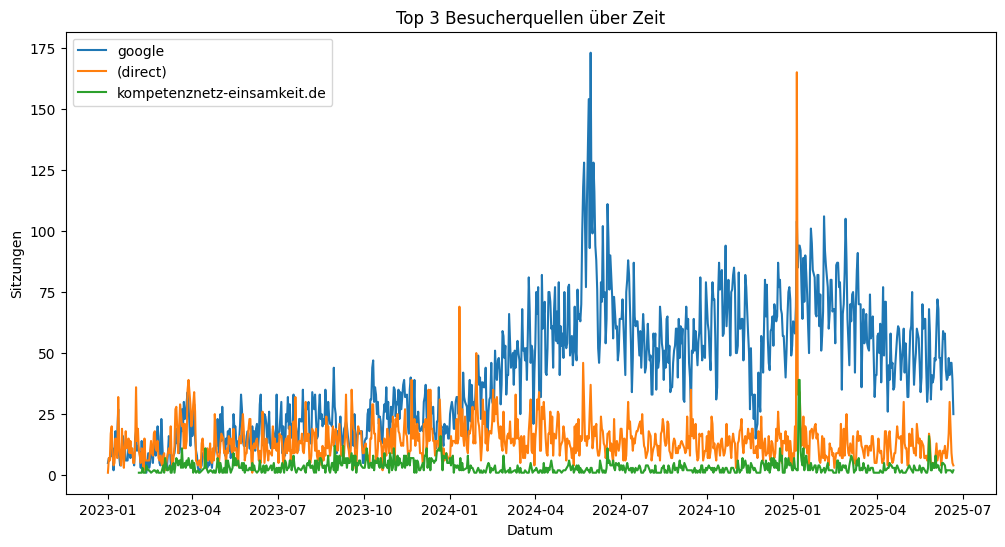

In [ ]:
# Tageszeitliche Nutzung (durchschnittliche Seitenaufrufe)
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_agg, x="datum", y="seitenaufrufe")
plt.title("Seitenaufrufe über die Zeit")
plt.xlabel("Datum")
plt.ylabel("Seitenaufrufe")
plt.show()

# Besucherquellen (Top 3) über Zeit
top_sources = (
    df_where_did_they_come_from.groupby("quelle")["sitzungen"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

plt.figure(figsize=(12, 6))
for source in top_sources:
    subset = df_where_did_they_come_from[
        df_where_did_they_come_from["quelle"] == source
    ]
    subset_agg = subset.groupby("datum")["sitzungen"].sum().reset_index()
    sns.lineplot(data=subset_agg, x="datum", y="sitzungen", label=source)

plt.title("Top 3 Besucherquellen über Zeit")
plt.xlabel("Datum")
plt.ylabel("Sitzungen")
plt.legend()
plt.show()